<a href="https://colab.research.google.com/github/husfuu/Mathematical-Modelling/blob/main/Modelling%20and%20Simulation%20in%20Python/Epidemiology/Epidemiology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## The Kermack-MCKendrick Model

* **S** : Orang yang "rentan", yaitu memungkinkan untuk tertular penyakit dari orang yang statusnya "Infected".
* **I** : Orang yang terinfeksi, memungkinkan menularkan penyakitnya ke orang yang statusnya "Suspectible".
* **R** : Orang yang "sembuh". Pada beberapa penyakit orang yang telah sembuh dianggap kebal terhadap infeksi.

* $N$ : Jumlah orang dalam suatu populasi.
* $\gamma$ : recovery rate | tingkat kesembuhan per hari
* $i$ : persentase orang yang terinfeksi || infection rate | tingkat penularan
* $\gamma i N$: Jumlah orang yang diharapkan sembuh perhari
* $\beta$ : contact rate || tingkat kontak per hari
* $s$ : persentase orang yang rentan
* $sN$: Jumlah orang yang rentan.
* $\beta s N$ : Jumlah kontak perhari.
* $\beta s i N$ : Jumlah kontak di mana orang lain menular. || Jumlah infeksi baru yang kita perkirakan per hari.
* $ \gamma i $: Jumlah orang yang sembuh per hari.
* $\beta s i $ : Jumlah orang yang terinfeksi per hari.

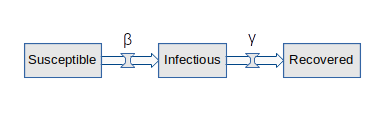

# Implementing the Kermack-MCKendrick Model

## Setup

Before implement the KM model, we have to prepare some libraries that will be useful for this implementation.

In [ ]:
# Install pint library
try:
    import pint
except ImportError:
    !pip install pint

     |████████████████████████████████| 204 kB 28.0 MB/s 


In [ ]:
# download modsim.py

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)
    
download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

Downloaded modsim.py


In [ ]:
# import all functions from modsim file

from modsim import *

Inisialisasi `State` object dengan ketentuan berikut:
* $s$ : 89
* $i$ : 1
* $r$ : 0

Ketentuan di atas bisa disebut dengan *initial condition* (kondisi awal)

In [ ]:
init = State(s=89, i=1, r=0)
show(init)

,state
s,89
i,1
r,0


Konversi setiap nilai variable di `init` ke dalam bentuk persentase.

In [ ]:
init = init / init.sum()
show(init)

,state
s,0.988889
i,0.011111
r,0.000000


Asumsikan jarak waktu terjadinya kontak adalah 3 hari, yang artinya setiap 3 hari terjadi kontak antara *infected* dengan *suspectible* dan jarak waktu kesembuhan adalah 4 hari, yang artinya setiap 4 hari ada yang sembuh.

In [ ]:
tc = 3      # jarak terjadi kontak dalam satuan hari
tr = 4      # jarak terjadi kesembuhan dalam satuan hari

Sehingga tingkat kontak dan kesembuhan per harinya adalah:

In [ ]:
beta = 1 / tc     # tingkat kontak per hari
gamma = 1 / tr    # tingkat kesembuhan per hari

print("beta : ", beta)
print("gamma : ", gamma)

beta :  0.3333333333333333
gamma :  0.25


`System` object digunakan untuk menyimpan parameter-parameter dan *initial condition*.

In [ ]:
def make_system(beta, gamma):
  init = State(s=89, i=1, r=0)
  init = init / init.sum()

  return System(init=init, t_end=7*14, beta=beta, gamma=gamma)

nilai defaul `t_end` adalah 14 minggu atau 1 semester, karena pada kasus ini menggunakan satuan hari, maka `t_end = 14*7`.

In [ ]:
system = make_system(beta, gamma)
show(system)

,value
init,s 0.988889 i 0.011111 r 0.000000 Name...
t_end,98
beta,0.333333
gamma,0.25


## Update Function

Mengambil keadaan sistem saat ini dan menghitung keadaan selama langkah waktu berikutnya. <br> <br>
**Parameter**
* `t` : waktu awal biasanya sama dengan 0
* `state` : kondisi awal
* `system` :  


In [ ]:
def update_func(t, state, system):
  s, i, r = state.s, state.i, state.r

  infected = system.beta * i * s
  recovered = system.gamma * i

  s = s - infected
  i = i + infected - recovered
  r = r + recovered

  return State(s=s, i=i, r=r)


##### Explanation

* `infected` : jumlah orang yang terinfeksi
* `recovered` : jumlah orang yang sembuh 
* `s` : jumlah orang yang rentan saat ini
* `i` : jumlah orang yang terinfeksi saat ini
* `r` : jumlah orang yang sembuh saat ini

parameter `t` tidak akan berpengaruh pada `update_function`, karena kegunaan dari `t` hanyalah untuk menginformasikan ke kita bahwa **waktu** awal nya berapa. <br>
Misal kita ingin membuat model berdasarkan data dari tahun 2010 sampai 2015 dan jika disepakati satuan untuk `t` adalah tahun, maka `t = 2010` dan `t_end = 2015` atau bisa disingkat menjadi `t = 0` dan `t_end = 5`.  <br>
**Note**
Parameter `t` akan berguna untuk function selanjutnya.

Kondisi (`state`) untuk 100 hari ke depan atau bisa diartikan persentase dari `s`, `i` dan `r` untuk 100 hari ke depan.

In [ ]:
state = update_func(0, init, system)

for t in range(0, 100):
    state = update_func(t, state, system)

show(state)

,state
s,0.520247
i,0.000524
r,0.479228


## Running the Simulation

In [ ]:
def run_simulation1(system, update_func):
  state = system.init

  for t in range(0, system.t_end):
    state = update_func(t, state, system)
  
  return state

In [ ]:
final_state = run_simulation1(system, update_func)
show(final_state)

,state
s,0.520568
i,0.000666
r,0.478766


**Kesimpulan**: <br>
Setelah 14 minggu (98 hari), ada 52% dari populasi yang berstatus rentan (mereka tidak pernah terinfeksi), hampir 48% sembuh (mereka pernah terinfeksi), dan kurang dari 1% masih terinfeksi.

## Collecting the Results

Selanjutnya kita ingin mengetahui bagaimana perubahan dari `state` di setiap waktu. Untuk mencapai tujuan tersebut kita akan menggunakan object `TimeSeries` dan object `TimeFrame`. <br><br>
**Note**: <br>
Untuk mengetahui jelas mengenai object TimeSeries dan TimeFrame buka file `modsim.py`.



#### `TimeSeries` Object

In [ ]:
def run_simulation2(system, update_func):
  S = TimeSeries()
  I = TimeSeries()
  R = TimeSeries()

  state = system.init
  S[0], I[0], R[0] = state
  
  for t in range(0, system.t_end):
    state = update_func(t, state, system)
    S[t+1], I[t+1], R[t+1] = state.s, state.i, state.r

  return S, I, R

In [ ]:
S, I, R = run_simulation2(system, update_func)

print("========== Suspectible ========")
print(pd.DataFrame(S.head()))
print("========== Infected ========")
print(pd.DataFrame(I.head()))
print("========== Recovered ========")
print(pd.DataFrame(R.head()))

========== Suspectible ========
      Quantity
Time          
0     0.988889
1     0.985226
2     0.981287
3     0.977055
4     0.972517
========== Infected ========
      Quantity
Time          
0     0.011111
1     0.011996
2     0.012936
3     0.013934
4     0.014988
========== Recovered ========
      Quantity
Time          
0     0.000000
1     0.002778
2     0.005777
3     0.009011
4     0.012494


In [ ]:
data = pd.concat([S, I, R], axis=1)

# rename the columns name
data.columns = ['S', 'I', 'R']

In [ ]:
data.head()

,S,I,R
Time,,,
0,0.988889,0.011111,0.000000
1,0.985226,0.011996,0.002778
2,0.981287,0.012936,0.005777
3,0.977055,0.013934,0.009011
4,0.972517,0.014988,0.012494


In [ ]:
import seaborn as sns

sns.set_style("darkgrid")
sns.lineplot(data = data)

SyntaxError: ignored

### `TimeFrame` Object

In [ ]:
def run_simulation(system, update_func):
  frame = TimeFrame(columns=system.init.index)
  frame.loc[0] = system.init

  for t in range(0, system.t_end):
    frame.loc[t+1] = update_func(t, frame.loc[t], system)
  
  return frame

In [ ]:
results = run_simulation(system, update_func)
results.head()

,s,i,r
0,0.988889,0.011111,0.000000
1,0.985226,0.011996,0.002778
2,0.981287,0.012936,0.005777
3,0.977055,0.013934,0.009011
4,0.972517,0.014988,0.012494


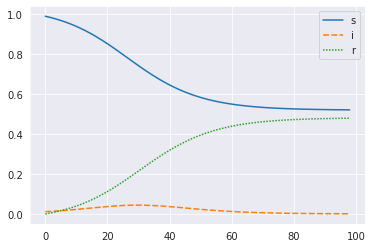

In [ ]:
sns.set_style("darkgrid")
sns.lineplot(data = results)